In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [2]:
# 1
categoryFreq_5=df['category'].value_counts().head(5)
categoryFreq_5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

TOP 5:
Sports & Outdoors                      
Beauty                                    
Handmade Clothing, Shoes & Accessories     
Bath & Body                               
Birthday Gifts  

In [3]:
categoryFreq=df['category'].value_counts().nlargest(10).index

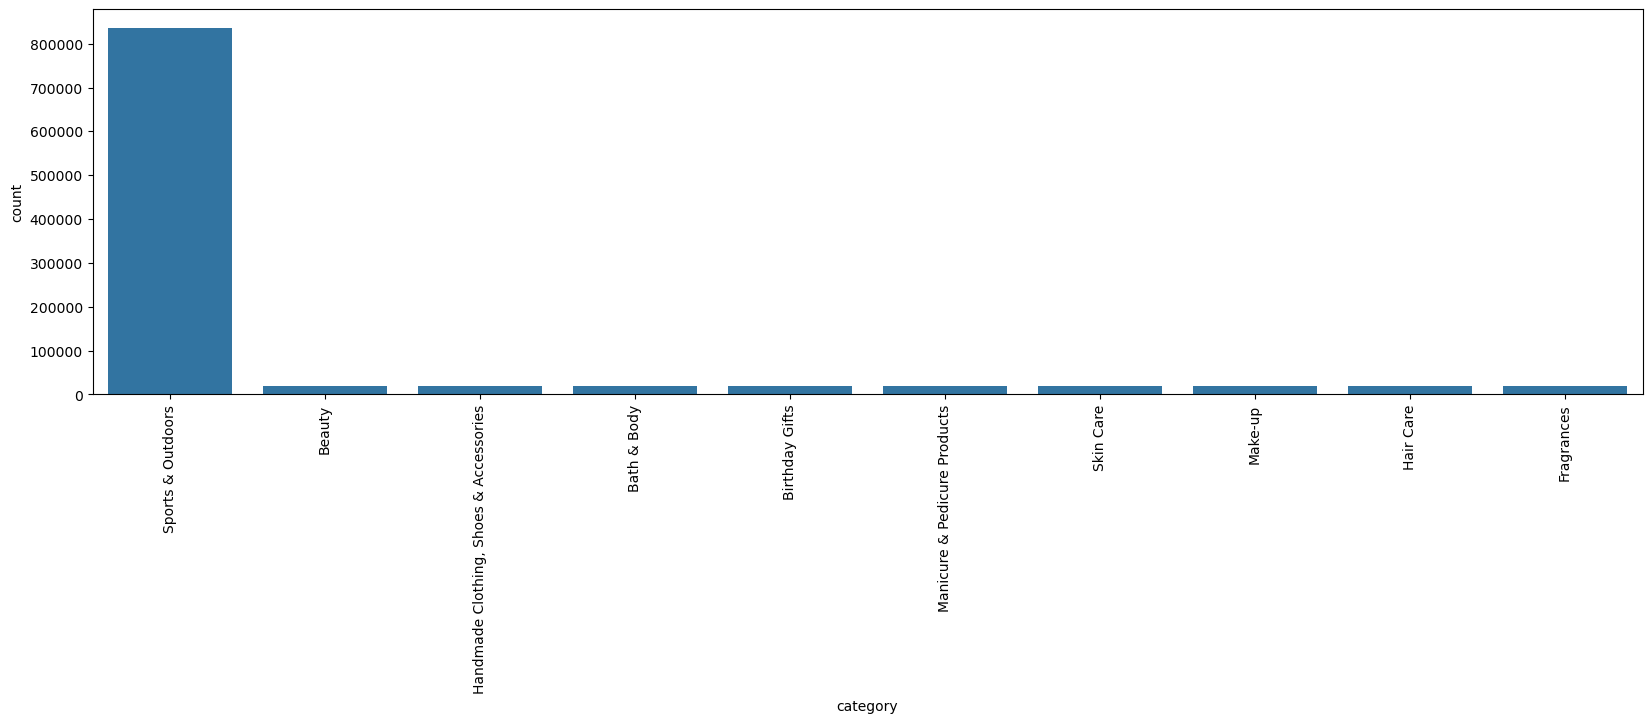

In [4]:
# 2
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='category', order=categoryFreq)
plt.xticks(rotation=90)
plt.show()

In [5]:
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564

SyntaxError: invalid syntax (820631204.py, line 1)

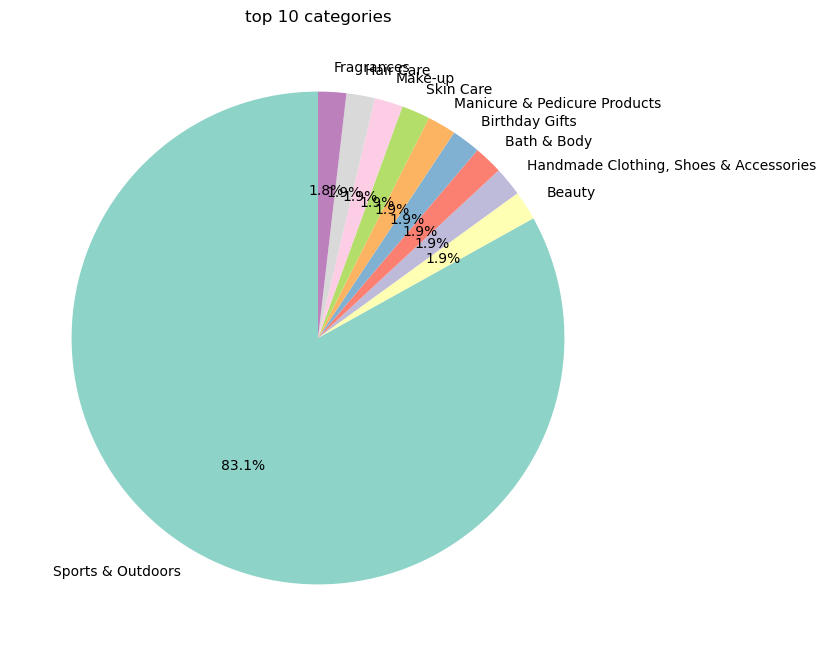

In [6]:
top10_cat=df['category'].value_counts().nlargest(10)
top10_cat

plt.figure(figsize = (8,8))
top10_cat.plot.pie(
    autopct='%.1f%%',startangle=90, colors=sns.color_palette("Set3")
)

plt.ylabel('')
plt.title('top 10 categories')
plt.show()

In [7]:
print(f'mean: {df['price'].mean()},\nmedian: {df['price'].median()},\nmode: {df['price'].mode()[0]}')

mean: 89.24380943923663,
median: 19.09,
mode: 9.99


The average price is almost 90 and the mode is almost 10, so the average is 9 times the most common price, median is also much closer to mode. Probably indicates a positive skewness.

In [8]:
print(f'variance: {df['price'].var()},\nstd: {df['price'].std()},\nrange: {df['price'].max()-df['price'].min()},\nmin: {df['price'].min()},\n25%: {df['price'].quantile(0.25)},\n50%: {df['price'].quantile(0.5)},\n75%: {df['price'].quantile(0.75)},\nmax: {df['price'].max()}')

variance: 119445.48532256528,
std: 345.60886175352226,
range: 100000.0,
min: 0.0,
25%: 9.99,
50%: 19.09,
75%: 45.99,
max: 100000.0


The data is highly spread, as expected already by the previous indicators of last question. The standard deviation itself is higher than the price on 75% of the population of prices. Those 75% of data alocation are responsible for only 5% of the range, which helps understand the big movement in the mean compared to median and mode.

<Axes: xlabel='price', ylabel='Count'>

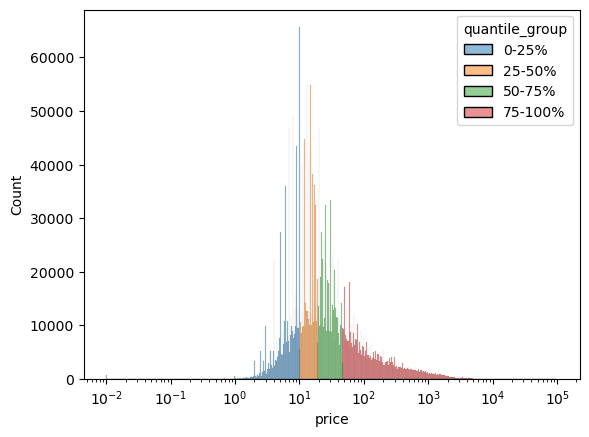

In [13]:
df['quantile_group'] = pd.qcut(df['price'], q=4, labels=['0-25%', '25-50%', '50-75%', '75-100%'])
sns.histplot(data=df, x='price', hue='quantile_group', log_scale=True)

In [ ]:
df.describe()

<Axes: xlabel='price'>

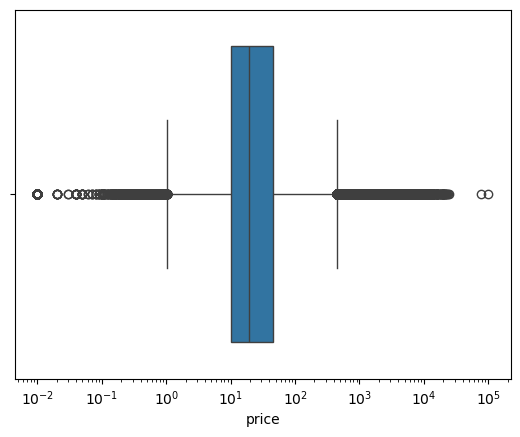

In [15]:
sns.boxplot(x=df['price'], log_scale=True)

As said before, in the histogram we can see that 75% of price range until 50 price.

In [16]:
print(f'mean: {df["stars"].mean()},\nmedian: {df["stars"].median()},\nmode: {df["stars"].mode()[0]}')
print(f'variance: {df["stars"].var()},\nstd: {df["stars"].std()},\nrange: {df["stars"].max()-df["stars"].min()},\nmin: {df["stars"].min()},\n25%: {df["stars"].quantile(0.25)},\n50%: {df["stars"].quantile(0.5)},\n75%: {df["stars"].quantile(0.75)},\nmax: {df["stars"].max()}')

mean: 2.152836472966065,
median: 0.0,
mode: 0.0
variance: 4.81743402976196,
std: 2.1948653785054697,
range: 5.0,
min: 0.0,
25%: 0.0,
50%: 0.0,
75%: 4.4,
max: 5.0


In [17]:
df["stars"].describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

Centrality: Generally customers rate with '0' OR they don't rate and the dataframe puts 0. 
Dispersion: There is a high contrast in the rates because or they are 0 or they are minimum 4.4 when rated.
The pattern doesn't seem to be very natural, and probably there's something wrong in the 0 ratings.

In [18]:
df["stars"].skew()

np.float64(0.08120735761080985)

In [20]:
df["stars"].kurtosis()

np.float64(-1.9260061280432985)

They are not normally distributed because they are very flat with the negative value of kurtosis.

<Axes: xlabel='stars', ylabel='Count'>

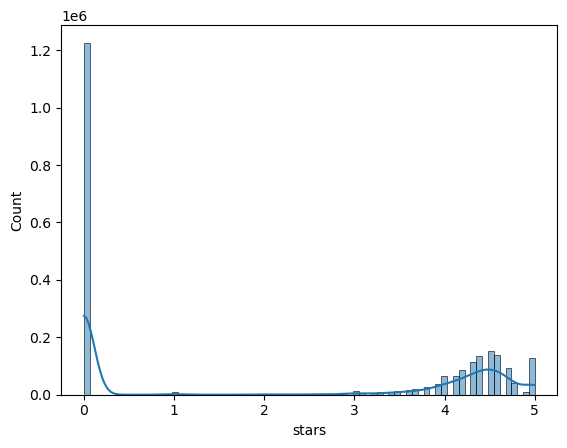

In [24]:
sns.histplot(data=df, x='stars', kde=True)

rate 0 is predominant